In [44]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
import seaborn as sns

%matplotlib inline

In [45]:
data = pd.read_csv('./user_data/final/KBAI_combined_v2.csv')
print(len(data))

344


In [46]:
data.head()

,user_name,id,label,type,type_data,grade_bucket,age_bucket,gender,eng_fluency,highest_degree,...,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor
0,User99,User99,User99,student,user_graph,b,25 to 34,Male,Native speaker,Bachelors Degree,...,0,0,0.000000,0,2,0,4.67,NaN,NaN,NaN
1,User98,User98,User98,student,user_graph,a,18 to 24,Male,Native speaker,Bachelors Degree,...,4,26,0.270833,0,4,-2,1.60,0,5,4
2,User97,User97,User97,student,user_graph,b,35 to 44,Male,Native speaker,Bachelors Degree,...,2,29,0.290909,20,2,0,1.00,0,3,4
3,User96,User96,User96,student,user_graph,c,25 to 34,Male,Fully fluent (non-native speaker),Doctoral Degree,...,3,30,0.297872,0,1,1,2.20,0,4,4
4,User95,User95,User95,student,user_graph,b,25 to 34,Male,Fully fluent (non-native speaker),Bachelors Degree,...,0,31,0.000000,0,1,-1,1.80,1,5,3


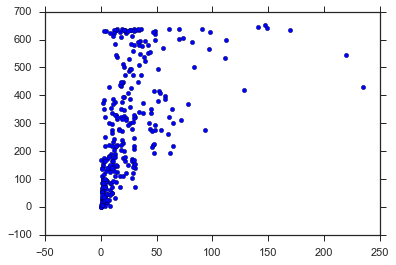

In [47]:
# scatter to guess clusters
plt.scatter(data['posts'], data['views'])
plt.show()

In [33]:
d2 = data.fillna(0)
#d2 = data.dropna(how='any', inplace=False)
print(len(d2))
print(d2.head())


344
  user_name      id   label     type   type_data grade_bucket age_bucket  \
0    User99  User99  User99  student  user_graph            b   25 to 34   
1    User98  User98  User98  student  user_graph            a   18 to 24   
2    User97  User97  User97  student  user_graph            b   35 to 44   
3    User96  User96  User96  student  user_graph            c   25 to 34   
4    User95  User95  User95  student  user_graph            b   25 to 34   

  gender                        eng_fluency    highest_degree    ...     \
0   Male                     Native speaker  Bachelors Degree    ...      
1   Male                     Native speaker  Bachelors Degree    ...      
2   Male                     Native speaker  Bachelors Degree    ...      
3   Male  Fully fluent (non-native speaker)   Doctoral Degree    ...      
4   Male  Fully fluent (non-native speaker)  Bachelors Degree    ...      

  degree strongcompnum closnesscentrality betweenesscentrality  \
0      0             0

In [14]:
#record No.
#d2.ix[9, :]
d2.ix[:, 27:].head()

,days,finalgrade,indegree,outdegree,degree,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor
0,90,61.98,0,0,0,0,0.000000,0,2,0,4.67,0,0,0
1,134,73.12,0,4,4,26,0.270833,0,4,-2,1.60,0,5,4
2,126,66.10,1,1,2,29,0.290909,20,2,0,1.00,0,3,4
3,59,58.47,0,3,3,30,0.297872,0,1,1,2.20,0,4,4
4,31,69.77,0,0,0,31,0.000000,0,1,-1,1.80,1,5,3


In [15]:
X = d2.ix[:, 27:].as_matrix(columns=None)
X

array([[  90.  ,   61.98,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [ 134.  ,   73.12,    0.  , ...,    0.  ,    5.  ,    4.  ],
       [ 126.  ,   66.1 ,    1.  , ...,    0.  ,    3.  ,    4.  ],
       ..., 
       [ 140.  ,   68.24,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,   60.15,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [  87.  ,   70.38,    0.  , ...,    0.  ,    0.  ,    0.  ]])

ward 0.658862968429
Dendogram


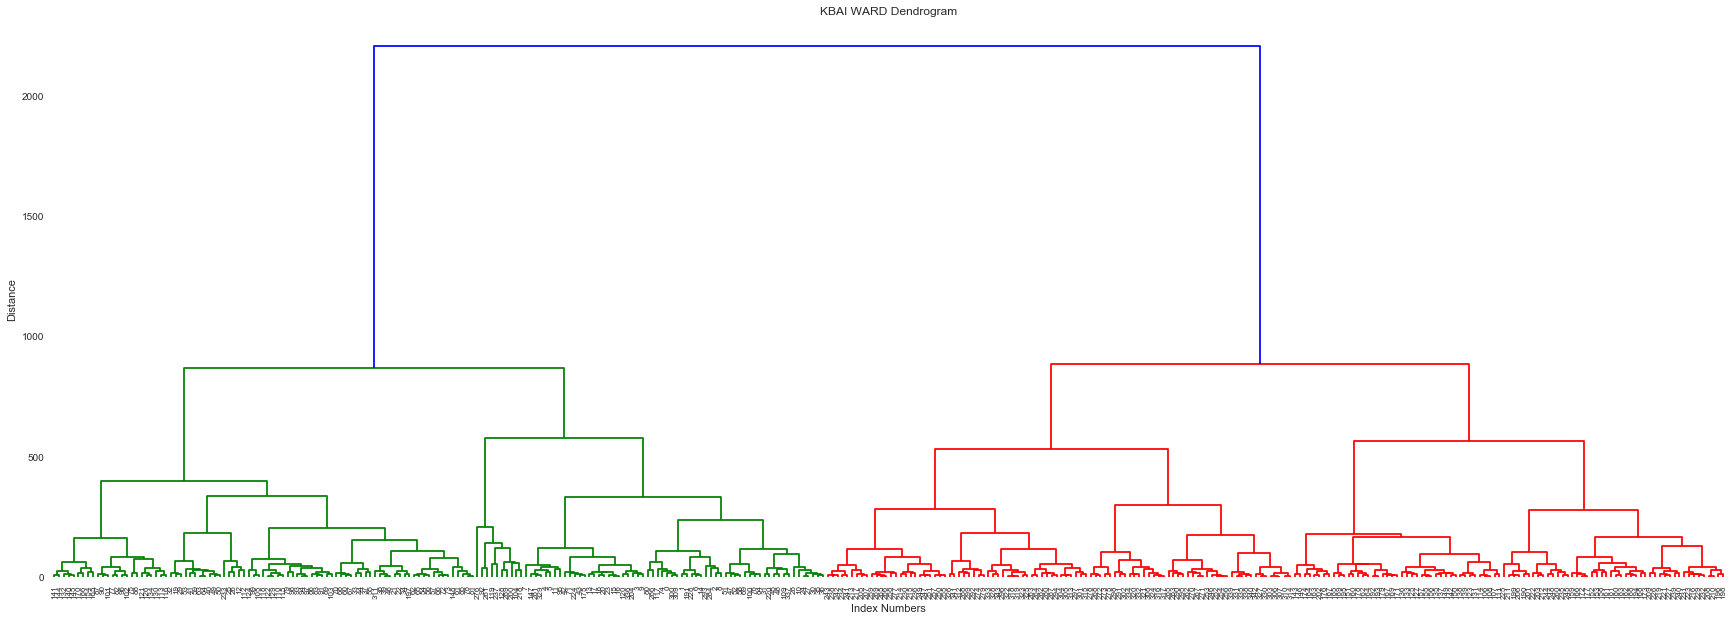

complete 0.649341361644
Dendogram


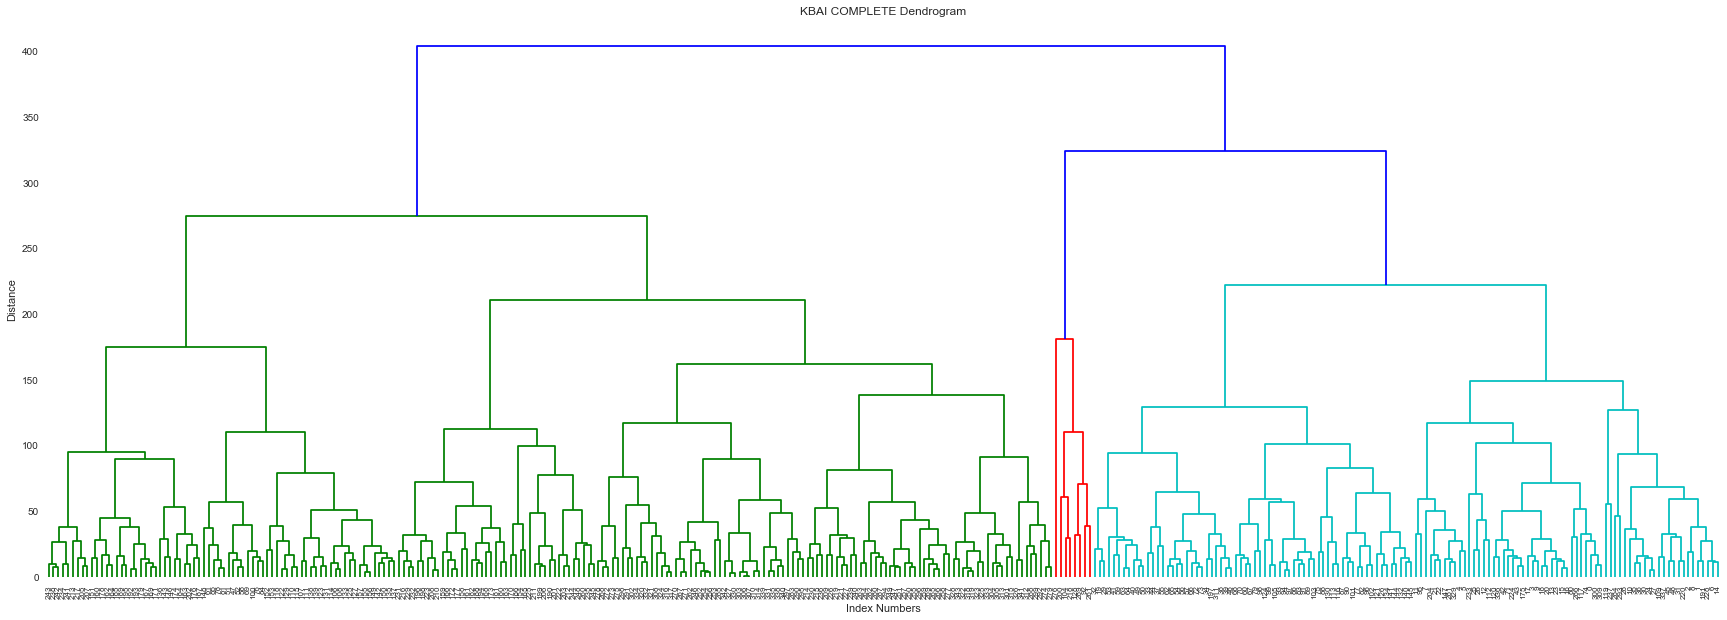

single 0.354380990286
Dendogram


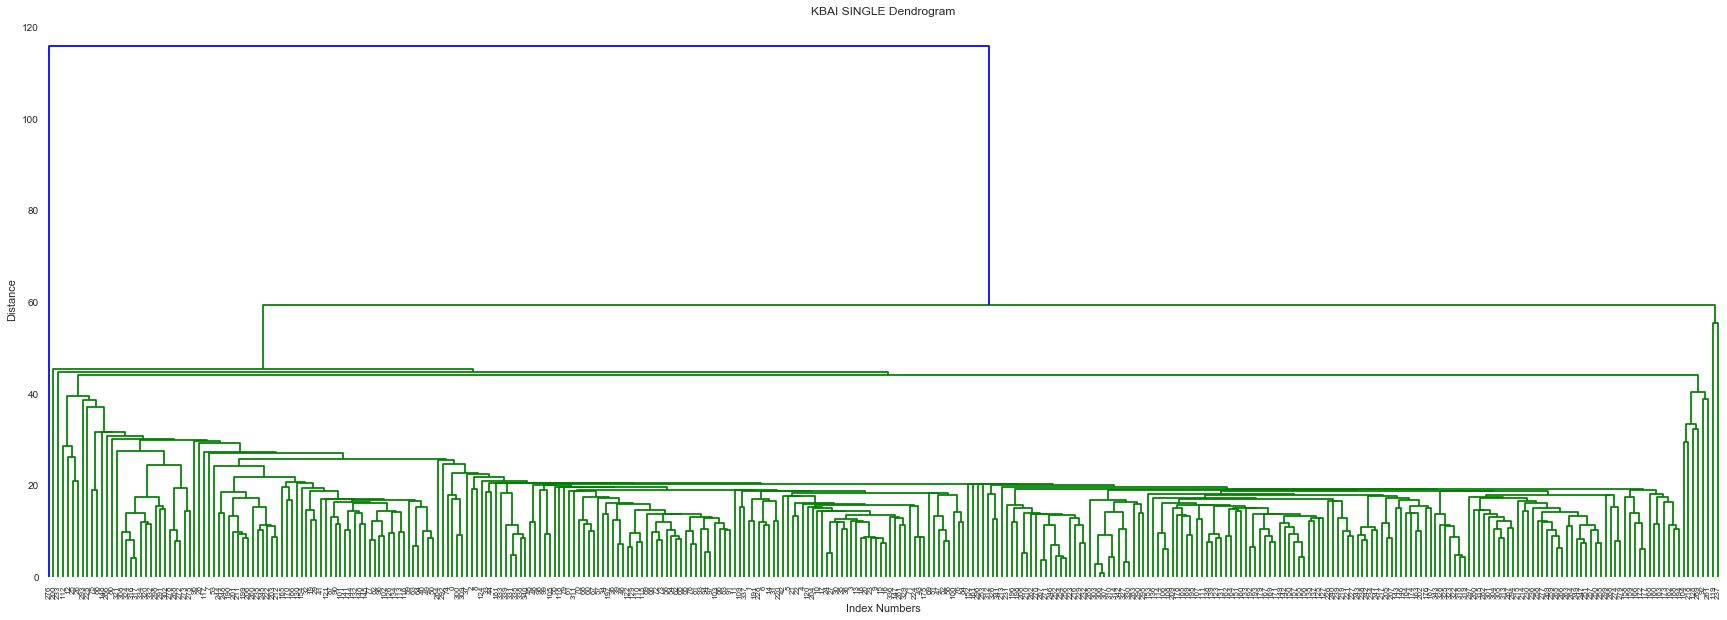

In [16]:
####################### ITERATE THROUGH DISTNACES ################################
from sklearn.grid_search import GridSearchCV
distances = ['ward','complete','single']
for i in distances:
    Z = linkage(X, i)
    c, coph_dists = cophenet(Z, pdist(X))
    print i,c
    print "Dendogram"
    plt.figure(figsize=(30, 10))
    plt.title('KBAI {} Dendrogram'.format(i.upper()))
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
#     print 'Truncated'
#     plt.title('Truncated Dendrogram')
#     plt.xlabel('Index Numbers')
#     plt.ylabel('Distance')
#     dendrogram(
#         Z,
#         truncate_mode='lastp',  
#         p=15,  
#         show_leaf_counts=False,  
#         leaf_rotation=90.,
#         leaf_font_size=12.,
#         show_contracted=True,  
#     )
#     plt.show()

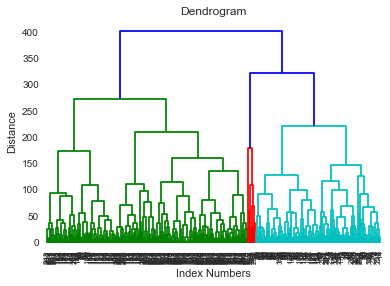

In [18]:
Z = linkage(X, 'complete')
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [34]:
max_dist = 250
clusters = fcluster(Z, max_dist, criterion='distance')
print np.unique(clusters)
print clusters

[1 2 3 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 1 4 4 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4
 4 4 1 4 1 4 4 1 4 4 1 1 4 4 4 4 4 4 3 4 4 4 4 4 4 4 1 4 4 4 3 4 1 1 1 4 1
 1 4 4 1 1 4 4 1 4 4 4 1 1 4 1 4 1 3 1 4 1 4 1 4 1 1 1 1 1 4 4 1 1 4 4 1 4
 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 2 2 1 4 1 2 1 1 2 2 2 2 1
 1 2 1 2 1 2 4 1 1 2 1 2 4 2 2 3 2 1 2 4 1 2 1 2 2 2 2 2 1 2 2 2 1 3 2 4 2
 2 2 4 2 2 2 4 2 2 2 2 4 1 2 2 4 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 4 2 2 4 2 4 2 2 3 2 2 2 4 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2
 2 2 2 4 4 2 2 2 2 2 2]


In [35]:
#apply clusters and get group averages
d2['hclusters'] = clusters
d2.head()

,user_name,id,label,type,type_data,grade_bucket,age_bucket,gender,eng_fluency,highest_degree,...,strongcompnum,closnesscentrality,betweenesscentrality,num_previous_OMSCS,cal_hr_expected_calc_change,confi_avg,confi_startend_diff,end_pace,end_rigor,hclusters
0,User99,User99,User99,student,user_graph,b,25 to 34,Male,Native speaker,Bachelors Degree,...,0,0.000000,0,2,0,4.67,0,0,0,4
1,User98,User98,User98,student,user_graph,a,18 to 24,Male,Native speaker,Bachelors Degree,...,26,0.270833,0,4,-2,1.60,0,5,4,4
2,User97,User97,User97,student,user_graph,b,35 to 44,Male,Native speaker,Bachelors Degree,...,29,0.290909,20,2,0,1.00,0,3,4,4
3,User96,User96,User96,student,user_graph,c,25 to 34,Male,Fully fluent (non-native speaker),Doctoral Degree,...,30,0.297872,0,1,1,2.20,0,4,4,4
4,User95,User95,User95,student,user_graph,b,25 to 34,Male,Fully fluent (non-native speaker),Bachelors Degree,...,31,0.000000,0,1,-1,1.80,1,5,3,4


In [149]:
#add categorical value indicators and re-do hierarchical clustering

In [150]:
#get list of all attributes
#list(d2.ix[:, 27:].columns)

In [22]:
#all vars
aggregation1 = {'id': 'count',
               'engfluency_boolean': 'count', 'male_boolean': 'count', 
              'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'eccentricity': 'mean','closnesscentrality':'mean',
               'harmonicclosnesscentrality': 'mean',
               'betweenesscentrality': 'mean',
               'componentnumber':'mean', 'strongcompnum':'mean',
               'modularity_class': 'mean','num_previous_OMSCS':'mean',
               'num_other_courses': 'mean','confi_avg': 'mean',
               'confi_var': 'mean','confi_startend_diff': 'mean',
               'quarter_confidence': 'mean','quarter_future_confidence': 'mean',
               'mid_confidence':'mean','mid_future_confidence': 'mean',
               'end_confidence': 'mean','pace_avg': 'mean', 'pac_var': 'mean',
               'pac_endstart_diff': 'mean','quarter_pace_eval': 'mean',
               'mid_pace_eval': 'mean', 'end_pace': 'mean','rigor_avg': 'mean',
               'rigor_var': 'mean','rigor_endstart_diff': 'mean',
               'quarter_rigor_eval': 'mean','mid_rigor_eval': 'mean',
               'end_rigor': 'mean', 'cal_hr_expected_calc_change':'mean',
               'end_expect_project_meet_num': 'mean',
               'end_expect_project_exceed_num': 'mean'}

In [36]:
#filtered vars
aggregation2 = {'id': 'count',
               'asks': 'mean', 'answers': 'mean', 'posts': 'mean',
               'views': 'mean', 'days': 'mean',
               'finalgrade': {'finalgrade_avg':'mean', 
                              'finalgrade_min': 'min',
                              'finalgrade_max': 'max'},
               'indegree': 'mean','outdegree': 'mean', 'degree': 'mean',
               'closnesscentrality':'mean',
               'betweenesscentrality': 'mean',
                'strongcompnum':'mean', 'num_previous_OMSCS':'mean',
               'confi_avg': 'mean','confi_startend_diff': 'mean',
                'end_pace': 'mean','end_rigor': 'mean', 
                'cal_hr_expected_calc_change':'mean'}

In [37]:
grp = d2.groupby('hclusters')
hcluster_grp = grp.agg(aggregation2)
hcluster_grp.to_csv('./user_data/final/kbai_hclsuter_output_v1.csv')

In [38]:
hcluster_grp

strongcompnum confi_startend_diff  end_pace     degree      asks  \
                   mean                mean      mean       mean      mean   
hclusters                                                                    
1            170.083333           -0.152778  3.916667   0.847222  1.916667   
2            270.918519           -0.081481  2.414815   0.214815  1.037037   
3             23.125000            0.000000  2.500000  11.750000  9.625000   
4             74.906977           -0.155039  3.193798   1.410853  2.000000   

                views  indegree betweenesscentrality confi_avg       posts  \
                 mean      mean                 mean      mean        mean   
hclusters                                                                    
1          372.888889  0.180556             0.555556  2.405139   29.541667   
2          197.762963  0.014815             0.007407  1.462963   14.207407   
3          510.125000  7.125000           156.541667  2.000000  107.750000   
4          237.806202  0.860465             4.043928  2.214186   20.961240   

               ...         answers outdegree end_rigor closnesscentrality  \
               ...            mean      mean      mean               mean   
hclusters      ...                                                          
1              ...        0.875000  0.666667  3.833333           0.212765   
2              ...        0.562963  0.200000  2.340741           0.084417   
3              ...        4.875000  4.625000  2.750000           0.448024   
4              ...        0.511628  0.550388  2.992248           0.113457   

          cal_hr_expected_calc_change    id num_previous_OMSCS     finalgrade  \
                                 mean count               mean finalgrade_min   
hclusters                                                                       
1                            0.805556    72           1.680556          39.69   
2                            0.725926   135           1.170370           0.00   
3                            1.000000     8           2.250000          63.81   
4                            0.255814   129           1.782946           0.00   

                                         
          finalgrade_max finalgrade_avg  
hclusters                                
1                  75.11      64.013472  
2                  77.09      47.225630  
3                  72.06      68.165000  
4                  76.18      45.246279  

[4 rows x 21 columns]

In [203]:
# plt.scatter(d2.ix[:,'finalgrade'], d2.ix[:,'views'], c=clusters, cmap='prism')
# plt.show()

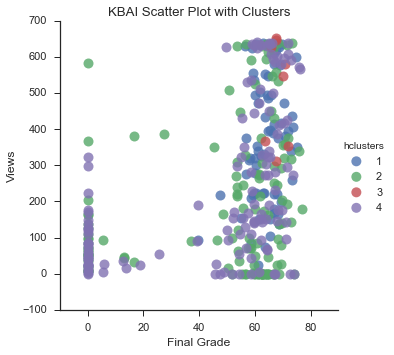

In [48]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('finalgrade', 'views', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('KBAI Scatter Plot with Clusters')
plt.xlabel('Final Grade')
plt.ylabel('Views')

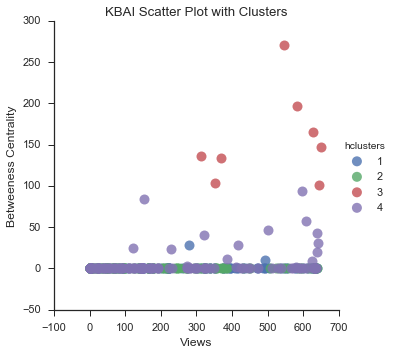

In [49]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('views', 'betweenesscentrality', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('KBAI Scatter Plot with Clusters')
plt.xlabel('Views')
plt.ylabel('Betweeness Centrality')

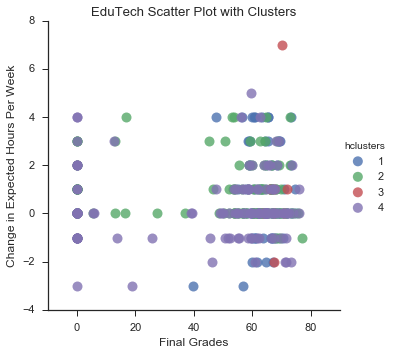

In [50]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('finalgrade', 'cal_hr_expected_calc_change', 
           data=d2, 
           fit_reg=False, 
           hue="hclusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('EduTech Scatter Plot with Clusters')
plt.xlabel('Final Grades')
plt.ylabel('Change in Expected Hours Per Week')